In [2]:
import tifffile
import numpy
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

In [3]:
tifffile.__version__

'2021.8.30'

In [4]:
data_dir = "/data/Experiment_data/weizmann/EhV/high_time_res/High/H1_T8/"

In [8]:
ch1 = sorted(list(Path(data_dir).glob("11*Ch1.*.tif*")))
ch4 = sorted(list(Path(data_dir).glob("11*Ch4.*.tif*")))
ch6 = sorted(list(Path(data_dir).glob("11*Ch6.*.tif*")))
ch7 = sorted(list(Path(data_dir).glob("11*Ch7.*.tif*")))
ch11 = sorted(list(Path(data_dir).glob("11*Ch11.*.tif*")))

In [21]:
list([str(c) for c in ch1]).index('/data/Experiment_data/weizmann/EhV/high_time_res/High/H1_T8_subset/10100_Ch1.ome.tif')

1

In [10]:
data = [tifffile.imread([str(t) for t in p]) for p in zip(ch1, ch4, ch6, ch7, ch11)]

TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER


In [11]:
mins = numpy.array([numpy.min(d.reshape(d.shape[0], -1), axis=1) for d in data])
mins = mins.min(axis=0)
mins

array([289,   0,   0,  27,   0], dtype=uint16)

In [12]:
sum(d[1].size for d in data)

1191771

In [18]:
l = list(filter(lambda d: numpy.nonzero(d[1] > 2**12)[0].size, enumerate(data)))

In [14]:
sum([numpy.nonzero(d > 4096)[0].size for d in data])

37767

In [28]:
indices = [l_[0] for l_ in l]

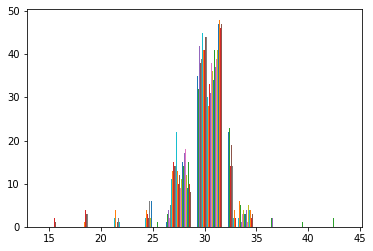

In [31]:
_ = plt.hist(numpy.clip(data[49][1], 0, 4096))

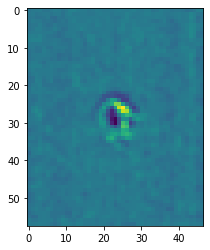

In [36]:
plt.imshow(data[49][0])

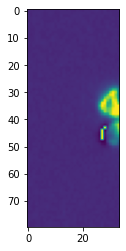

In [53]:
plt.imshow(numpy.clip(data[0][1], 0, 250))

In [27]:
maxs = numpy.array([numpy.max(d.reshape(d.shape[0], -1), axis=1) for d in data])
maxs = maxs.max(axis=0)
maxs

array([ 1166, 65535, 65535,  4082, 65535], dtype=uint16)

In [29]:
data_norm = [(d - mins[..., numpy.newaxis, numpy.newaxis]) / (maxs - mins)[..., numpy.newaxis, numpy.newaxis] for d in data]

In [30]:
data_norm[1][0].max()

0.7682648401826484

In [31]:
data_norm[1][0].min()

0.4794520547945205

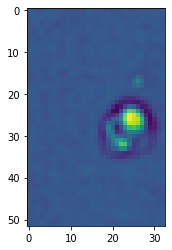

In [37]:
plt.imshow(data_norm[1][0])

In [162]:
[d[0].max() for d in data_norm]

[0.6917808219178082,
 0.7682648401826484,
 0.6438356164383562,
 0.6746575342465754,
 0.6289954337899544,
 0.7226027397260274,
 0.7123287671232876,
 0.7077625570776256,
 0.7625570776255708,
 0.6723744292237442,
 0.6678082191780822,
 0.7077625570776256,
 0.6655251141552512,
 0.7568493150684932,
 0.6404109589041096,
 0.8264840182648402,
 0.6484018264840182,
 0.7534246575342466,
 0.7374429223744292,
 0.7374429223744292,
 0.7454337899543378,
 0.6735159817351598,
 0.776255707762557,
 0.7465753424657534,
 0.7968036529680366,
 0.7831050228310502,
 0.6986301369863014,
 0.7648401826484018,
 0.6929223744292238,
 0.726027397260274,
 0.6404109589041096,
 0.7351598173515982,
 0.6073059360730594,
 0.6472602739726028,
 0.6712328767123288,
 0.7922374429223744,
 0.7168949771689498,
 0.708904109589041,
 0.7968036529680366,
 0.7442922374429224,
 0.708904109589041,
 0.7294520547945206,
 0.6974885844748858,
 0.7865296803652968,
 0.7157534246575342,
 0.7408675799086758,
 0.6906392694063926,
 0.64155251141552

In [163]:
[d[0].min() for d in data_norm]

[0.4714611872146119,
 0.4794520547945205,
 0.4691780821917808,
 0.3561643835616438,
 0.4257990867579909,
 0.502283105022831,
 0.4840182648401826,
 0.5045662100456622,
 0.4897260273972603,
 0.10616438356164383,
 0.4497716894977169,
 0.5,
 0.4977168949771689,
 0.502283105022831,
 0.4942922374429224,
 0.4577625570776256,
 0.5045662100456622,
 0.4657534246575342,
 0.4942922374429224,
 0.4805936073059361,
 0.4817351598173516,
 0.4897260273972603,
 0.4646118721461187,
 0.476027397260274,
 0.4977168949771689,
 0.04908675799086758,
 0.4554794520547945,
 0.20776255707762556,
 0.4863013698630137,
 0.3127853881278539,
 0.4942922374429224,
 0.4429223744292237,
 0.4577625570776256,
 0.5034246575342466,
 0.4577625570776256,
 0.4600456621004566,
 0.4965753424657534,
 0.4200913242009132,
 0.4931506849315068,
 0.4611872146118721,
 0.4885844748858447,
 0.0410958904109589,
 0.4440639269406393,
 0.478310502283105,
 0.4908675799086758,
 0.19863013698630136,
 0.4452054794520548,
 0.010273972602739725,
 0.47